# UUUU

In [1]:
NTRIAL = 5

In [2]:
testcases = ((0.05, 0.00001),
             (0.04, 0.00001),
             (0.02, 0.00001),
             (0.01, 0.00001),
             (0.005, 0.00001),
             (0.002, 0.00001),
             (0.001, 0.00001),
             (0.05, 0.000015),
             (0.04, 0.000015),)

In [3]:
import os

for tc in testcases:
    
    path_tc = "uuuu_%5.3f_%8.6f" % tc
    if not os.path.isdir(path_tc):
        os.mkdir(path_tc)

    for itrial in range(NTRIAL):

        path = path_tc + "/%03i" % itrial
        if not os.path.isdir(path):
            os.mkdir(path)

        fout = open("%s/uuuu.inp" % (path,),'w')
        for l in open("uuuu_template.inp"):
            l = l.replace("##PATH##", path)
            l = l.replace("##STEP##", "10000000")
            l = l.replace("##STEPSIZE##", "%f" % tc[0])
            l = l.replace("##VISCOSITY##", "%f" % tc[1])
            l = l.replace("##SEED##", "%i" % (11000 + itrial))
            fout.write(l)
        fout.close()

In [6]:
import subprocess
import os

for tc in testcases:
    
    path_tc = "uuuu_%5.3f_%8.6f" % tc

    for itrial in range(NTRIAL):

        path = path_tc + "/%03i" % itrial
        
        fout = open(path+'/out','w')
        ferr = open(path+'/err','w')
        subprocess.call(['../../md', path+'/uuuu.inp'], stdout=fout, stderr=ferr)
        fout.close()
        ferr.close()
        
        # Delete the ts file to save the disc
        os.remove(path+'/uuuu.ts')

In [8]:
import numpy as np

mean_std_trials = {}
for tc in testcases:
    
    path_tc = "uuuu_%5.3f_%8.6f" % tc

    trials = []
    for itrial in range(NTRIAL):
        
        path = path_tc + "/%03i" % itrial
        
        dk = []
        dc = []
        dc_com = []
        for l in open(path+'/uuuu.T'):
            lsp = l.split()
            Tk = float(lsp[1])
            Tc = float(lsp[2])
            Tc_com = float(lsp[3])
            dk.append(Tk)
            dc.append(Tc)
            dc_com.append(Tc_com)
            
        trials.append(((np.mean(dk), np.mean(dc), np.mean(dc_com)),
                      (np.std(dk), np.std(dc), np.std(dc_com))))
    
    mean_std_trials[tc] = trials

In [24]:
mean_std_trials

{(0.05, 1e-05): [(284.2895457141996, 70.00946643756077),
  (284.2681567168, 69.91329380438005),
  (284.2168534783003, 69.92358304051892),
  (284.1819150145, 69.96156005414684),
  (284.19320247200045, 70.04654926266605)],
 (0.04, 1e-05): [(287.49092756239986, 70.77354484848199),
  (287.51313879089963, 70.69624272093198),
  (287.43243328669996, 70.72264840775796),
  (287.3952808032995, 70.7108483184556),
  (287.4137746522003, 70.84784297272736)],
 (0.02, 1e-05): [(293.87058087949987, 72.29123733861927),
  (293.85232493230046, 72.30038356935586),
  (293.8022733332996, 72.30279610133121),
  (293.84118502129996, 72.23988347964763),
  (293.7133735757002, 72.43350527928588)],
 (0.01, 1e-05): [(297.0807143947998, 73.08593892401294),
  (297.0015808966999, 73.14615519660049),
  (296.84561887909973, 73.02401426497185),
  (296.8883735684, 73.06428172418116),
  (296.7004037250997, 73.09502229584629)],
 (0.005, 1e-05): [(298.71890524909963, 73.47812482410413),
  (298.73612797119995, 73.4782678121955

In [9]:
mean_std_trials

{(0.05,
  1e-05): [((284.28256246359956, 272.9647640456004, 300.2612403623),
   (69.97484145396469, 540.539016335498, 594.5929183941471)), ((284.2850514001,
    274.77973973180013,
    302.25771366870003),
   (69.90634666334276,
    539.8116120855433,
    593.7927732839225)), ((284.23179281100016, 264.25433331650027, 290.67976655070066),
   (69.95606044745098,
    543.1757228445344,
    597.4932953226685)), ((284.1969650988, 268.7422091255002, 295.6164301265),
   (69.93399555849291,
    539.995191864958,
    593.9947107426774)), ((284.1847476812006,
    269.07231167010013,
    295.97954301230027),
   (70.0112373939317, 541.9120420868613, 596.1032460874771))],
 (0.04,
  1e-05): [((287.5171737543999, 275.46744482909986, 303.0141894271998),
   (70.76284893213948,
    541.5001769497936,
    595.6501947166391)), ((287.5030958431003, 279.75667408000004, 307.7323413390996),
   (70.69869393465909,
    539.9038913485226,
    593.8942804258155)), ((287.44578572380016, 262.2336035692999, 288.4569

In [10]:

from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:80% !important; }</style>")) 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
import numpy as np

plt.rc('text', usetex=True)  # To use bold font in LaTex
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"] #To use bold font in LaTex
plt.rcParams['figure.autolayout']=True
plt.rcParams['figure.figsize'] = 4, 3
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] ='sans-serif' #使用するフォントファミリー
plt.rcParams['font.serif'] = ['Tahoma']
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica']  #使用するフォント(探す順序)
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 8 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.05
plt.rcParams['savefig.transparent'] = True

Text(0, 0.5, 'Kinetic temperature')

/home/hori/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/hori/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/hori/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


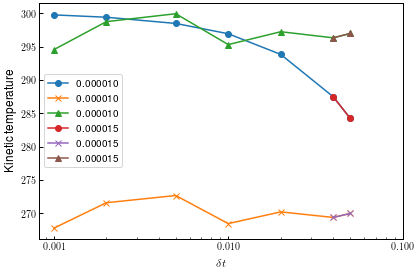

In [11]:
fig, axs = plt.subplots(1,1)

ax = axs

ax.plot()

viscs = set()
for tc in testcases:
    if tc[1] not in viscs:
        viscs.add(tc[1])
    
for visc in viscs:
    
    time_step_sizes = []
    mean_Tks = []
    std_Tks = []
    mean_Tcs = []
    std_Tcs = []
    mean_Tc_coms = []
    std_Tc_coms = []
    
    for tc in testcases:
        if tc[1] != visc:
            continue
        
        trials = mean_std_trials[tc]
        
        Tk_m = np.mean([t[0][0] for t in trials])
        Tk_s = np.mean([t[1][0] for t in trials])
        
        Tc_m = np.mean([t[0][1] for t in trials])
        Tc_s = np.mean([t[1][1] for t in trials])
        
        Tc_com_m = np.mean([t[0][2] for t in trials])
        Tc_com_s = np.mean([t[1][2] for t in trials])
    
        time_step_sizes.append(tc[0])
        mean_Tks.append(Tk_m)
        std_Tks.append(Tk_s)
        mean_Tcs.append(Tc_m)
        std_Tcs.append(Tc_s)
        mean_Tc_coms.append(Tc_com_m)
        std_Tc_coms.append(Tc_com_s)
    
    ax.plot(time_step_sizes, mean_Tks, '-o', label='%f' % visc)
    ax.plot(time_step_sizes, mean_Tcs, '-x', label='%f' % visc)
    ax.plot(time_step_sizes, mean_Tc_coms, '-^', label='%f' % visc)
    
ax.set_xscale('log')
ax.set_xticks([0.001, 0.01, 0.1])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter()) # This set ticklabels automatically.
#ax.set_xticklabels(('0.1','1','10')) # If you want to set labels manually.

ax.legend()

ax.set_xlabel(r'$\delta t$', fontsize=12)
ax.set_ylabel(r'Kinetic temperature', fontsize=12)

# Azo

In [12]:
NTRIAL = 2

In [13]:
testcases = ((0.05, 0.00001),)

In [14]:
import os

for tc in testcases:
    
    path_tc = "azo_%5.3f_%8.6f" % tc
    if not os.path.isdir(path_tc):
        os.mkdir(path_tc)

    for itrial in range(NTRIAL):

        path = path_tc + "/%03i" % itrial
        if not os.path.isdir(path):
            os.mkdir(path)

        fout = open("%s/azo.inp" % (path,),'w')
        for l in open("azo_template.inp"):
            l = l.replace("##PATH##", path)
            l = l.replace("##STEP##", "100000")
            l = l.replace("##STEPSIZE##", "%f" % tc[0])
            l = l.replace("##VISCOSITY##", "%f" % tc[1])
            l = l.replace("##SEED##", "%i" % (11000 + itrial))
            fout.write(l)
        fout.close()

In [15]:
import subprocess
import os

for tc in testcases:
    
    path_tc = "azo_%5.3f_%8.6f" % tc

    for itrial in range(NTRIAL):

        path = path_tc + "/%03i" % itrial
        
        fout = open(path+'/out','w')
        ferr = open(path+'/err','w')
        subprocess.call(['../../md', path+'/azo.inp'], stdout=fout, stderr=ferr)
        fout.close()
        ferr.close()
        
        # Delete the ts file to save the disc
        #os.remove(path+'/azo.ts')

In [17]:
import numpy as np

mean_std_trials = {}
for tc in testcases:
    
    path_tc = "azo_%5.3f_%8.6f" % tc

    trials = []
    for itrial in range(NTRIAL):
        
        path = path_tc + "/%03i" % itrial
        
        dk = []
        dc = []
        dc_com = []
        for il, l in enumerate(open(path+'/azo.T')):
            if il < 1000:
                continue
            lsp = l.split()
            Tk = float(lsp[1])
            Tc = float(lsp[2])
            Tc_com = float(lsp[3])
            dk.append(Tk)
            dc.append(Tc)
            dc_com.append(Tc_com)
            
        trials.append(((np.mean(dk), np.mean(dc), np.mean(dc_com)),
                      (np.std(dk), np.std(dc), np.std(dc_com))))
    
    mean_std_trials[tc] = trials

In [18]:
mean_std_trials

{(0.05,
  1e-05): [((309.6500906565937, 151.4963055216087, 151.60482290856572),
   (6.446658799222626,
    96.85723204273899,
    96.92662229540798)), ((309.24051705366077, 152.52744306188202, 152.63670825463836),
   (6.8134833505195544, 116.86728303080096, 116.95099739492045))]}